In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnistdata.loader import MNIST
from sklearn.manifold import TSNE
from ae import e, d

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name='x')
z = e(x)
xr = d(z)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')

In [6]:
examples = 3
x_batch, _ = mnist.next_batch(examples)
xr_batch = sess.run(xr, {x: x_batch})

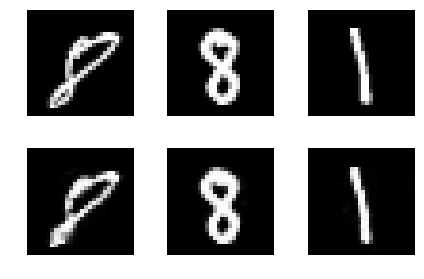

In [7]:
fig, axs = plt.subplots(2, examples)
fi = 0
for i in range(examples):
    axs[0, i].imshow(x_batch[fi].reshape([28, 28]), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(xr_batch[fi].reshape([28, 28]), cmap='gray')
    axs[1, i].axis('off')
    fi += 1
fig.tight_layout()
plt.show()

In [8]:
test_xz = sess.run(z, {x: mnist.test_imgs})

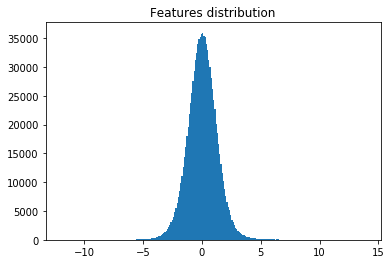

In [9]:
plt.hist(test_xz.flatten(), bins=250)
plt.title('Features distribution')
plt.show()

In [10]:
z2d = TSNE(n_iter=300).fit_transform(test_xz)

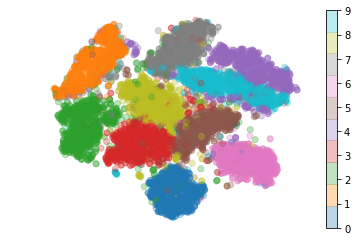

In [20]:
plt.scatter(z2d[:, 0], z2d[:, 1], c=mnist.test_labels, cmap='tab10', alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()